In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
pd.set_option('display.max_columns', None)

In [3]:
online_df = pd.read_csv('OnlineNewsPopularity.csv')

In [4]:
online_df.head()

,url,timedelta,n_tokens_title,n_tokens_content,n_unique_tokens,n_non_stop_words,n_non_stop_unique_tokens,num_hrefs,num_self_hrefs,num_imgs,num_videos,average_token_length,num_keywords,data_channel_is_lifestyle,data_channel_is_entertainment,data_channel_is_bus,data_channel_is_socmed,data_channel_is_tech,data_channel_is_world,kw_min_min,kw_max_min,kw_avg_min,kw_min_max,kw_max_max,kw_avg_max,kw_min_avg,kw_max_avg,kw_avg_avg,self_reference_min_shares,self_reference_max_shares,self_reference_avg_sharess,weekday_is_monday,weekday_is_tuesday,weekday_is_wednesday,weekday_is_thursday,weekday_is_friday,weekday_is_saturday,weekday_is_sunday,is_weekend,LDA_00,LDA_01,LDA_02,LDA_03,LDA_04,global_subjectivity,global_sentiment_polarity,global_rate_positive_words,global_rate_negative_words,rate_positive_words,rate_negative_words,avg_positive_polarity,min_positive_polarity,max_positive_polarity,avg_negative_polarity,min_negative_polarity,max_negative_polarity,title_subjectivity,title_sentiment_polarity,abs_title_subjectivity,abs_title_sentiment_polarity,shares
0,http://mashable.com/2013/01/07/amazon-instant-...,731.0,12.0,219.0,0.663594,1.0,0.815385,4.0,2.0,1.0,0.0,4.680365,5.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,496.0,496.0,496.000000,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.500331,0.378279,0.040005,0.041263,0.040123,0.521617,0.092562,0.045662,0.013699,0.769231,0.230769,0.378636,0.100000,0.7,-0.350000,-0.600,-0.200000,0.500000,-0.187500,0.000000,0.187500,593
1,http://mashable.com/2013/01/07/ap-samsung-spon...,731.0,9.0,255.0,0.604743,1.0,0.791946,3.0,1.0,1.0,0.0,4.913725,4.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.799756,0.050047,0.050096,0.050101,0.050001,0.341246,0.148948,0.043137,0.015686,0.733333,0.266667,0.286915,0.033333,0.7,-0.118750,-0.125,-0.100000,0.000000,0.000000,0.500000,0.000000,711
2,http://mashable.com/2013/01/07/apple-40-billio...,731.0,9.0,211.0,0.575130,1.0,0.663866,3.0,1.0,1.0,0.0,4.393365,6.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,918.0,918.0,918.000000,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.217792,0.033334,0.033351,0.033334,0.682188,0.702222,0.323333,0.056872,0.009479,0.857143,0.142857,0.495833,0.100000,1.0,-0.466667,-0.800,-0.133333,0.000000,0.000000,0.500000,0.000000,1500
3,http://mashable.com/2013/01/07/astronaut-notre...,731.0,9.0,531.0,0.503788,1.0,0.665635,9.0,0.0,1.0,0.0,4.404896,7.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.028573,0.419300,0.494651,0.028905,0.028572,0.429850,0.100705,0.041431,0.020716,0.666667,0.333333,0.385965,0.136364,0.8,-0.369697,-0.600,-0.166667,0.000000,0.000000,0.500000,0.000000,1200
4,http://mashable.com/2013/01/07/att-u-verse-apps/,731.0,13.0,1072.0,0.415646,1.0,0.540890,19.0,19.0,20.0,0.0,4.682836,7.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,545.0,16000.0,3151.157895,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.028633,0.028794,0.028575,0.028572,0.885427,0.513502,0.281003,0.074627,0.012127,0.860215,0.139785,0.411127,0.033333,1.0,-0.220192,-0.500,-0.050000,0.454545,0.136364,0.045455,0.136364,505


In [5]:
# deleting url not in need
online_df.drop('url', axis=1, inplace=True)

In [6]:
online_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39644 entries, 0 to 39643
Data columns (total 60 columns):
 timedelta                        39644 non-null float64
 n_tokens_title                   39644 non-null float64
 n_tokens_content                 39644 non-null float64
 n_unique_tokens                  39644 non-null float64
 n_non_stop_words                 39644 non-null float64
 n_non_stop_unique_tokens         39644 non-null float64
 num_hrefs                        39644 non-null float64
 num_self_hrefs                   39644 non-null float64
 num_imgs                         39644 non-null float64
 num_videos                       39644 non-null float64
 average_token_length             39644 non-null float64
 num_keywords                     39644 non-null float64
 data_channel_is_lifestyle        39644 non-null float64
 data_channel_is_entertainment    39644 non-null float64
 data_channel_is_bus              39644 non-null float64
 data_channel_is_socmed           39

In [7]:
online_df.isnull().sum()

 timedelta                        0
 n_tokens_title                   0
 n_tokens_content                 0
 n_unique_tokens                  0
 n_non_stop_words                 0
 n_non_stop_unique_tokens         0
 num_hrefs                        0
 num_self_hrefs                   0
 num_imgs                         0
 num_videos                       0
 average_token_length             0
 num_keywords                     0
 data_channel_is_lifestyle        0
 data_channel_is_entertainment    0
 data_channel_is_bus              0
 data_channel_is_socmed           0
 data_channel_is_tech             0
 data_channel_is_world            0
 kw_min_min                       0
 kw_max_min                       0
 kw_avg_min                       0
 kw_min_max                       0
 kw_max_max                       0
 kw_avg_max                       0
 kw_min_avg                       0
 kw_max_avg                       0
 kw_avg_avg                       0
 self_reference_min_shares  

no null/nan values present

In [8]:
online_df.describe().T

,count,mean,std,min,25%,50%,75%,max
timedelta,39644.0,354.530471,214.163767,8.00000,164.000000,339.000000,542.000000,731.000000
n_tokens_title,39644.0,10.398749,2.114037,2.00000,9.000000,10.000000,12.000000,23.000000
n_tokens_content,39644.0,546.514731,471.107508,0.00000,246.000000,409.000000,716.000000,8474.000000
n_unique_tokens,39644.0,0.548216,3.520708,0.00000,0.470870,0.539226,0.608696,701.000000
n_non_stop_words,39644.0,0.996469,5.231231,0.00000,1.000000,1.000000,1.000000,1042.000000
n_non_stop_unique_tokens,39644.0,0.689175,3.264816,0.00000,0.625739,0.690476,0.754630,650.000000
num_hrefs,39644.0,10.883690,11.332017,0.00000,4.000000,8.000000,14.000000,304.000000
num_self_hrefs,39644.0,3.293638,3.855141,0.00000,1.000000,3.000000,4.000000,116.000000
num_imgs,39644.0,4.544143,8.309434,0.00000,1.000000,1.000000,4.000000,128.000000
num_videos,39644.0,1.249874,4.107855,0.00000,0.000000,0.000000,1.000000,91.000000


In [9]:
online_df.columns = online_df.columns.map(lambda x: x.replace(' ',''))

In [10]:
online_df['shares'].describe()

count     39644.000000
mean       3395.380184
std       11626.950749
min           1.000000
25%         946.000000
50%        1400.000000
75%        2800.000000
max      843300.000000
Name: shares, dtype: float64

In [11]:
(online_df['shares'] >= online_df['shares'].median()).sum()

21154

In [12]:
(online_df['shares'] < online_df['shares'].median()).sum()

18490

In [13]:
21154 - 18490

2664

In [14]:
popular = online_df[online_df['shares'] >= online_df['shares'].median()]

In [15]:
not_popular = online_df[online_df['shares'] < online_df['shares'].median()]

In [16]:
popular.shape, not_popular.shape

((21154, 60), (18490, 60))

## Changing Continious column to Category column for Classification

In [17]:
# online_df[online_df['shares'] > online_df['shares'].median()] = 1

In [18]:
# online_df[online_df['shares'] <= int(online_df['shares'].median())] = 0

In [19]:
online_df['shares'].dtype

dtype('int64')

In [20]:
var = online_df['shares']

In [21]:
var.describe()

count     39644.000000
mean       3395.380184
std       11626.950749
min           1.000000
25%         946.000000
50%        1400.000000
75%        2800.000000
max      843300.000000
Name: shares, dtype: float64

In [22]:
from sklearn.preprocessing import LabelEncoder

In [23]:
LE = LabelEncoder()

In [24]:
online_df['class_shares'] = pd.Series(LE.fit_transform(var >= 1400))

In [25]:
online_df['class_shares'] = online_df['class_shares'].astype('category')

In [26]:
shares = online_df.pop('shares')

In [27]:
online_df['class_shares'].dtype

CategoricalDtype(categories=[0, 1], ordered=False)

In [28]:
online_df['class_shares'].value_counts()

1    21154
0    18490
Name: class_shares, dtype: int64

Text(0.5, 0, 'not popular                                             popular')

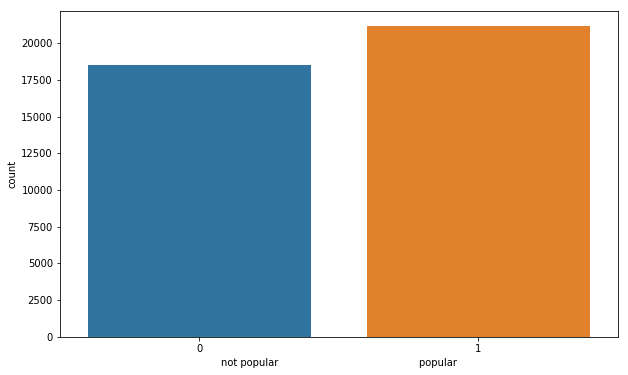

In [29]:
plt.figure(figsize=(10,6))
sns.countplot(online_df['class_shares'])
plt.xlabel('not popular                                             popular')

# 2. Split Data set:

In [30]:
from sklearn.model_selection import train_test_split

In [31]:
x = online_df.drop('class_shares', axis=1)

In [32]:
y = online_df['class_shares']

In [33]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state = 42)

In [34]:
x_train.shape, x_test.shape, y_train.shape, y_test.shape

((27750, 59), (11894, 59), (27750,), (11894,))

In [35]:
from statsmodels.api import Logit, add_constant 

In [36]:
x_cons = add_constant(x)

D:\program\python\lib\site-packages\numpy\core\fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


In [37]:
x_cons.head()

,const,timedelta,n_tokens_title,n_tokens_content,n_unique_tokens,n_non_stop_words,n_non_stop_unique_tokens,num_hrefs,num_self_hrefs,num_imgs,num_videos,average_token_length,num_keywords,data_channel_is_lifestyle,data_channel_is_entertainment,data_channel_is_bus,data_channel_is_socmed,data_channel_is_tech,data_channel_is_world,kw_min_min,kw_max_min,kw_avg_min,kw_min_max,kw_max_max,kw_avg_max,kw_min_avg,kw_max_avg,kw_avg_avg,self_reference_min_shares,self_reference_max_shares,self_reference_avg_sharess,weekday_is_monday,weekday_is_tuesday,weekday_is_wednesday,weekday_is_thursday,weekday_is_friday,weekday_is_saturday,weekday_is_sunday,is_weekend,LDA_00,LDA_01,LDA_02,LDA_03,LDA_04,global_subjectivity,global_sentiment_polarity,global_rate_positive_words,global_rate_negative_words,rate_positive_words,rate_negative_words,avg_positive_polarity,min_positive_polarity,max_positive_polarity,avg_negative_polarity,min_negative_polarity,max_negative_polarity,title_subjectivity,title_sentiment_polarity,abs_title_subjectivity,abs_title_sentiment_polarity
0,1.0,731.0,12.0,219.0,0.663594,1.0,0.815385,4.0,2.0,1.0,0.0,4.680365,5.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,496.0,496.0,496.000000,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.500331,0.378279,0.040005,0.041263,0.040123,0.521617,0.092562,0.045662,0.013699,0.769231,0.230769,0.378636,0.100000,0.7,-0.350000,-0.600,-0.200000,0.500000,-0.187500,0.000000,0.187500
1,1.0,731.0,9.0,255.0,0.604743,1.0,0.791946,3.0,1.0,1.0,0.0,4.913725,4.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.799756,0.050047,0.050096,0.050101,0.050001,0.341246,0.148948,0.043137,0.015686,0.733333,0.266667,0.286915,0.033333,0.7,-0.118750,-0.125,-0.100000,0.000000,0.000000,0.500000,0.000000
2,1.0,731.0,9.0,211.0,0.575130,1.0,0.663866,3.0,1.0,1.0,0.0,4.393365,6.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,918.0,918.0,918.000000,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.217792,0.033334,0.033351,0.033334,0.682188,0.702222,0.323333,0.056872,0.009479,0.857143,0.142857,0.495833,0.100000,1.0,-0.466667,-0.800,-0.133333,0.000000,0.000000,0.500000,0.000000
3,1.0,731.0,9.0,531.0,0.503788,1.0,0.665635,9.0,0.0,1.0,0.0,4.404896,7.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.028573,0.419300,0.494651,0.028905,0.028572,0.429850,0.100705,0.041431,0.020716,0.666667,0.333333,0.385965,0.136364,0.8,-0.369697,-0.600,-0.166667,0.000000,0.000000,0.500000,0.000000
4,1.0,731.0,13.0,1072.0,0.415646,1.0,0.540890,19.0,19.0,20.0,0.0,4.682836,7.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,545.0,16000.0,3151.157895,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.028633,0.028794,0.028575,0.028572,0.885427,0.513502,0.281003,0.074627,0.012127,0.860215,0.139785,0.411127,0.033333,1.0,-0.220192,-0.500,-0.050000,0.454545,0.136364,0.045455,0.136364


In [38]:
base_model = Logit(y, x_cons)

In [39]:
result = base_model.fit()

         Current function value: 0.623473
         Iterations: 35


D:\program\python\lib\site-packages\statsmodels\base\model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


In [40]:
result.summary2()

D:\program\python\lib\site-packages\statsmodels\base\model.py:1092: RuntimeWarning: invalid value encountered in sqrt
  bse_ = np.sqrt(np.diag(self.cov_params()))
D:\program\python\lib\site-packages\scipy\stats\_distn_infrastructure.py:877: RuntimeWarning: invalid value encountered in greater
  return (self.a < x) & (x < self.b)
D:\program\python\lib\site-packages\scipy\stats\_distn_infrastructure.py:877: RuntimeWarning: invalid value encountered in less
  return (self.a < x) & (x < self.b)
D:\program\python\lib\site-packages\scipy\stats\_distn_infrastructure.py:1831: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= self.a)


<class 'statsmodels.iolib.summary2.Summary'>
"""
                                         Results: Logit
================================================================================================
Model:                         Logit                      Pseudo R-squared:           0.098     
Dependent Variable:            class_shares               AIC:                        49547.9351
Date:                          2019-11-07 19:19           BIC:                        50037.4337
No. Observations:              39644                      Log-Likelihood:             -24717.   
Df Model:                      56                         LL-Null:                    -27390.   
Df Residuals:                  39587                      LLR p-value:                0.0000    
Converged:                     0.0000                     Scale:                      1.0000    
No. Iterations:                35.0000                                                          
------------------------------------------------------------------------------------------------
                                Coef.      Std.Err.      z     P>|z|      [0.025       0.975]   
------------------------------------------------------------------------------------------------
const                         -2004.6172          nan      nan    nan           nan          nan
timedelta                        -0.0000       0.0001  -0.2338 0.8151       -0.0002       0.0001
n_tokens_title                    0.0021       0.0054   0.3856 0.6998       -0.0086       0.0127
n_tokens_content                  0.0001       0.0000   2.9741 0.0029        0.0000       0.0002
n_unique_tokens                  -0.0872       0.3627  -0.2404 0.8100       -0.7980       0.6236
n_non_stop_words                  2.6902       1.5335   1.7543 0.0794       -0.3153       5.6957
n_non_stop_unique_tokens         -0.5818       0.3067  -1.8971 0.0578       -1.1828       0.0193
num_hrefs                         0.0087       0.0013   6.5159 0.0000        0.0061       0.0114
num_self_hrefs                   -0.0182       0.0035  -5.1952 0.0000       -0.0250      -0.0113
num_imgs                          0.0019       0.0017   1.0933 0.2742       -0.0015       0.0052
num_videos                        0.0005       0.0030   0.1655 0.8686       -0.0054       0.0064
average_token_length             -0.1367       0.0455  -3.0054 0.0027       -0.2258      -0.0475
num_keywords                      0.0430       0.0070   6.1595 0.0000        0.0293       0.0567
data_channel_is_lifestyle        -0.1100       0.0752  -1.4638 0.1432       -0.2574       0.0373
data_channel_is_entertainment    -0.2936       0.0475  -6.1820 0.0000       -0.3867      -0.2005
data_channel_is_bus              -0.1741       0.0725  -2.4016 0.0163       -0.3161      -0.0320
data_channel_is_socmed            0.8689       0.0736  11.8128 0.0000        0.7248       1.0131
data_channel_is_tech              0.5387       0.0700   7.6939 0.0000        0.4015       0.6759
data_channel_is_world             0.0536       0.0707   0.7588 0.4480       -0.0849       0.1921
kw_min_min                        0.0019       0.0003   6.2591 0.0000        0.0013       0.0026
kw_max_min                        0.0000       0.0000   2.0343 0.0419        0.0000       0.0000
kw_avg_min                       -0.0002       0.0001  -2.4128 0.0158       -0.0003      -0.0000
kw_min_max                       -0.0000       0.0000  -2.7337 0.0063       -0.0000      -0.0000
kw_max_max                       -0.0000       0.0000  -2.8520 0.0043       -0.0000      -0.0000
kw_avg_max                       -0.0000       0.0000  -3.7102 0.0002       -0.0000      -0.0000
kw_min_avg                       -0.0001       0.0000  -6.1543 0.0000       -0.0001      -0.0001
kw_max_avg                       -0.0001       0.0000 -17.7504 0.0000       -0.0001      -0.0001
kw_avg_avg                        0.0007       0.0000  24.6636 0.0000        0.0007       0.0008
self_reference_

In [41]:
result.prsquared

0.09757677075473636

Pseudo R-squ.:	0.097576

In [42]:
from sklearn.linear_model import LogisticRegression

In [43]:
Log_model = LogisticRegression()

In [44]:
Log_model.fit(x_train, y_train)

D:\program\python\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [45]:
Log_model.score(x_train, y_train)

0.6095855855855856

In [46]:
Log_model.score(x_test, y_test)

0.6050109298806121

# 3. Build a base model:

In [47]:
Logit_basemodel = LogisticRegression()

In [48]:
Logit_basemodel.fit(x_train, y_train)

D:\program\python\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [49]:
print('Train Accuracy',Logit_basemodel.score(x_train, y_train))

Train Accuracy 0.6095855855855856


In [50]:
print('Test Accuracy',Logit_basemodel.score(x_test, y_test))

Test Accuracy 0.6050109298806121


In [51]:
from sklearn.metrics import roc_auc_score, confusion_matrix, classification_report, roc_curve

In [52]:
Logit_pred = Log_model.predict(x_test)

In [53]:
print('confusion matrix')
confusion_matrix(y_test, Logit_pred)

confusion matrix


array([[2890, 2701],
       [1997, 4306]], dtype=int64)

In [54]:
print('classification report')
print(classification_report(y_test, Logit_pred))

classification report
              precision    recall  f1-score   support

           0       0.59      0.52      0.55      5591
           1       0.61      0.68      0.65      6303

    accuracy                           0.61     11894
   macro avg       0.60      0.60      0.60     11894
weighted avg       0.60      0.61      0.60     11894



In [55]:
# 1 = popular, 
# 0 = not_popular

In [56]:
Logit_pred_prob = Log_model.predict_proba(x_test)

In [57]:
Logit_pred_prob[:,1]

array([0.48361073, 0.46153088, 0.61543155, ..., 0.71716825, 0.60825213,
       0.42626087])

In [58]:
fpr, tpr, threshold = roc_curve(y_test, Logit_pred_prob[:,1])

Text(0, 0.5, 'True Positive rate (tpr)')

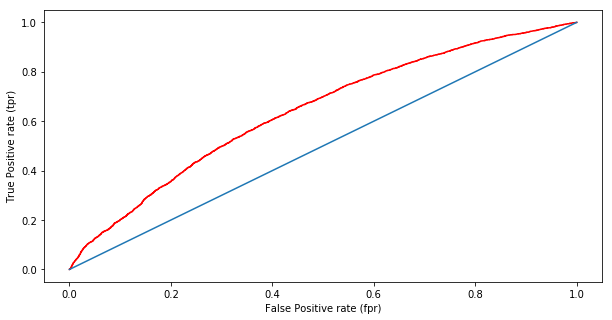

In [59]:
plt.figure(figsize=(10,5))
plt.plot(fpr, tpr, color='r')
plt.plot([0,1],[0,1])
plt.xlabel('False Positive rate (fpr)')
plt.ylabel('True Positive rate (tpr)')

In [60]:
roc_auc_score(y_test, Logit_pred_prob[:,1])

0.640876765493647

# 4. EDA -  Plots:
A.Check for Outlier using Box plot and apply the formula to check how many of these data has outliers 

B.Apply correlation plot and display with colour code and numerical indication

C.Plot best X with Y and find how the Y is varying with X. Like if X is continuous, go for scatter plot. if X is categorical, go for box plot.
Apply density plot and check if the data is normally distributed

In [61]:
online_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39644 entries, 0 to 39643
Data columns (total 60 columns):
timedelta                        39644 non-null float64
n_tokens_title                   39644 non-null float64
n_tokens_content                 39644 non-null float64
n_unique_tokens                  39644 non-null float64
n_non_stop_words                 39644 non-null float64
n_non_stop_unique_tokens         39644 non-null float64
num_hrefs                        39644 non-null float64
num_self_hrefs                   39644 non-null float64
num_imgs                         39644 non-null float64
num_videos                       39644 non-null float64
average_token_length             39644 non-null float64
num_keywords                     39644 non-null float64
data_channel_is_lifestyle        39644 non-null float64
data_channel_is_entertainment    39644 non-null float64
data_channel_is_bus              39644 non-null float64
data_channel_is_socmed           39644 non-null flo

In [62]:
(online_df.duplicated()).any()
# no duplicate rows

False

In [63]:
cor = online_df.corr()

In [64]:
cor[np.abs(cor) > 0.3].count()

timedelta                        4
n_tokens_title                   1
n_tokens_content                 6
n_unique_tokens                  3
n_non_stop_words                 3
n_non_stop_unique_tokens         3
num_hrefs                        4
num_self_hrefs                   3
num_imgs                         3
num_videos                       1
average_token_length             8
num_keywords                     2
data_channel_is_lifestyle        1
data_channel_is_entertainment    2
data_channel_is_bus              2
data_channel_is_socmed           1
data_channel_is_tech             2
data_channel_is_world            2
kw_min_min                       4
kw_max_min                       4
kw_avg_min                       4
kw_min_max                       3
kw_max_max                       4
kw_avg_max                       8
kw_min_avg                       4
kw_max_avg                       4
kw_avg_avg                       7
self_reference_min_shares        3
self_reference_max_s

In [65]:
online_df['shares'] = shares

In [66]:
online_df.head()

,timedelta,n_tokens_title,n_tokens_content,n_unique_tokens,n_non_stop_words,n_non_stop_unique_tokens,num_hrefs,num_self_hrefs,num_imgs,num_videos,average_token_length,num_keywords,data_channel_is_lifestyle,data_channel_is_entertainment,data_channel_is_bus,data_channel_is_socmed,data_channel_is_tech,data_channel_is_world,kw_min_min,kw_max_min,kw_avg_min,kw_min_max,kw_max_max,kw_avg_max,kw_min_avg,kw_max_avg,kw_avg_avg,self_reference_min_shares,self_reference_max_shares,self_reference_avg_sharess,weekday_is_monday,weekday_is_tuesday,weekday_is_wednesday,weekday_is_thursday,weekday_is_friday,weekday_is_saturday,weekday_is_sunday,is_weekend,LDA_00,LDA_01,LDA_02,LDA_03,LDA_04,global_subjectivity,global_sentiment_polarity,global_rate_positive_words,global_rate_negative_words,rate_positive_words,rate_negative_words,avg_positive_polarity,min_positive_polarity,max_positive_polarity,avg_negative_polarity,min_negative_polarity,max_negative_polarity,title_subjectivity,title_sentiment_polarity,abs_title_subjectivity,abs_title_sentiment_polarity,class_shares,shares
0,731.0,12.0,219.0,0.663594,1.0,0.815385,4.0,2.0,1.0,0.0,4.680365,5.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,496.0,496.0,496.000000,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.500331,0.378279,0.040005,0.041263,0.040123,0.521617,0.092562,0.045662,0.013699,0.769231,0.230769,0.378636,0.100000,0.7,-0.350000,-0.600,-0.200000,0.500000,-0.187500,0.000000,0.187500,0,593
1,731.0,9.0,255.0,0.604743,1.0,0.791946,3.0,1.0,1.0,0.0,4.913725,4.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.799756,0.050047,0.050096,0.050101,0.050001,0.341246,0.148948,0.043137,0.015686,0.733333,0.266667,0.286915,0.033333,0.7,-0.118750,-0.125,-0.100000,0.000000,0.000000,0.500000,0.000000,0,711
2,731.0,9.0,211.0,0.575130,1.0,0.663866,3.0,1.0,1.0,0.0,4.393365,6.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,918.0,918.0,918.000000,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.217792,0.033334,0.033351,0.033334,0.682188,0.702222,0.323333,0.056872,0.009479,0.857143,0.142857,0.495833,0.100000,1.0,-0.466667,-0.800,-0.133333,0.000000,0.000000,0.500000,0.000000,1,1500
3,731.0,9.0,531.0,0.503788,1.0,0.665635,9.0,0.0,1.0,0.0,4.404896,7.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.028573,0.419300,0.494651,0.028905,0.028572,0.429850,0.100705,0.041431,0.020716,0.666667,0.333333,0.385965,0.136364,0.8,-0.369697,-0.600,-0.166667,0.000000,0.000000,0.500000,0.000000,0,1200
4,731.0,13.0,1072.0,0.415646,1.0,0.540890,19.0,19.0,20.0,0.0,4.682836,7.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,545.0,16000.0,3151.157895,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.028633,0.028794,0.028575,0.028572,0.885427,0.513502,0.281003,0.074627,0.012127,0.860215,0.139785,0.411127,0.033333,1.0,-0.220192,-0.500,-0.050000,0.454545,0.136364,0.045455,0.136364,0,505


In [67]:
online_df['num_keywords'].unique()

array([ 5.,  4.,  6.,  7.,  9., 10.,  8.,  3.,  1.,  2.])

In [68]:
# Outlier using Box plot and apply the formula to check how many of these data has outliers

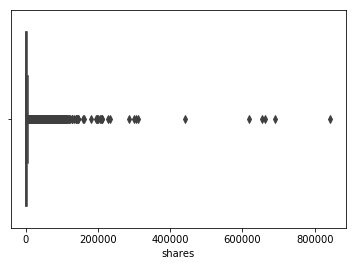

In [69]:
sns.boxplot(online_df['shares'])

In [70]:
online_df['shares'].describe()

count     39644.000000
mean       3395.380184
std       11626.950749
min           1.000000
25%         946.000000
50%        1400.000000
75%        2800.000000
max      843300.000000
Name: shares, dtype: float64

In [71]:
q1 = online_df['shares'].quantile(0.25)
q3 = online_df['shares'].quantile(0.75)
IQR = q3 - q1
upper_wisker = q3 + 1.5 * IQR
lower_wisker = q1 - 1.5 * IQR
print('upper_wisker:',upper_wisker, 'lower_wisker:',lower_wisker)

upper_wisker: 5581.0 lower_wisker: -1835.0


In [72]:
online_df[online_df['shares'] > upper_wisker].shape

(4541, 61)

In [73]:
online_df[online_df['shares'] < lower_wisker].shape

(0, 61)

In [76]:
# Different way of calculating  out liers
(np.abs(online_df.shares - np.mean(online_df.shares)) > 3 * np.std(online_df.shares)).sum()

308

In [78]:
def outliers1(col):
    print(col,'number of outliers', (np.abs(online_df[col] - np.mean(online_df[col])) > 3 * np.std(online_df[col])).sum())





for col in online_df.drop('class_shares', axis=1).columns:
    outliers1(col)

timedelta number of outliers 0
n_tokens_title number of outliers 156
n_tokens_content number of outliers 693
n_unique_tokens number of outliers 1
n_non_stop_words number of outliers 1
n_non_stop_unique_tokens number of outliers 1
num_hrefs number of outliers 731
num_self_hrefs number of outliers 699
num_imgs number of outliers 863
num_videos number of outliers 986
average_token_length number of outliers 1185
num_keywords number of outliers 51
data_channel_is_lifestyle number of outliers 2099
data_channel_is_entertainment number of outliers 0
data_channel_is_bus number of outliers 0
data_channel_is_socmed number of outliers 2323
data_channel_is_tech number of outliers 0
data_channel_is_world number of outliers 0
kw_min_min number of outliers 4
kw_max_min number of outliers 271
kw_avg_min number of outliers 278
kw_min_max number of outliers 469
kw_max_max number of outliers 3096
kw_avg_max number of outliers 336
kw_min_avg number of outliers 0
kw_max_avg number of outliers 393
kw_avg_avg

##### B.	Apply correlation plot and display with colour code and numerical indication

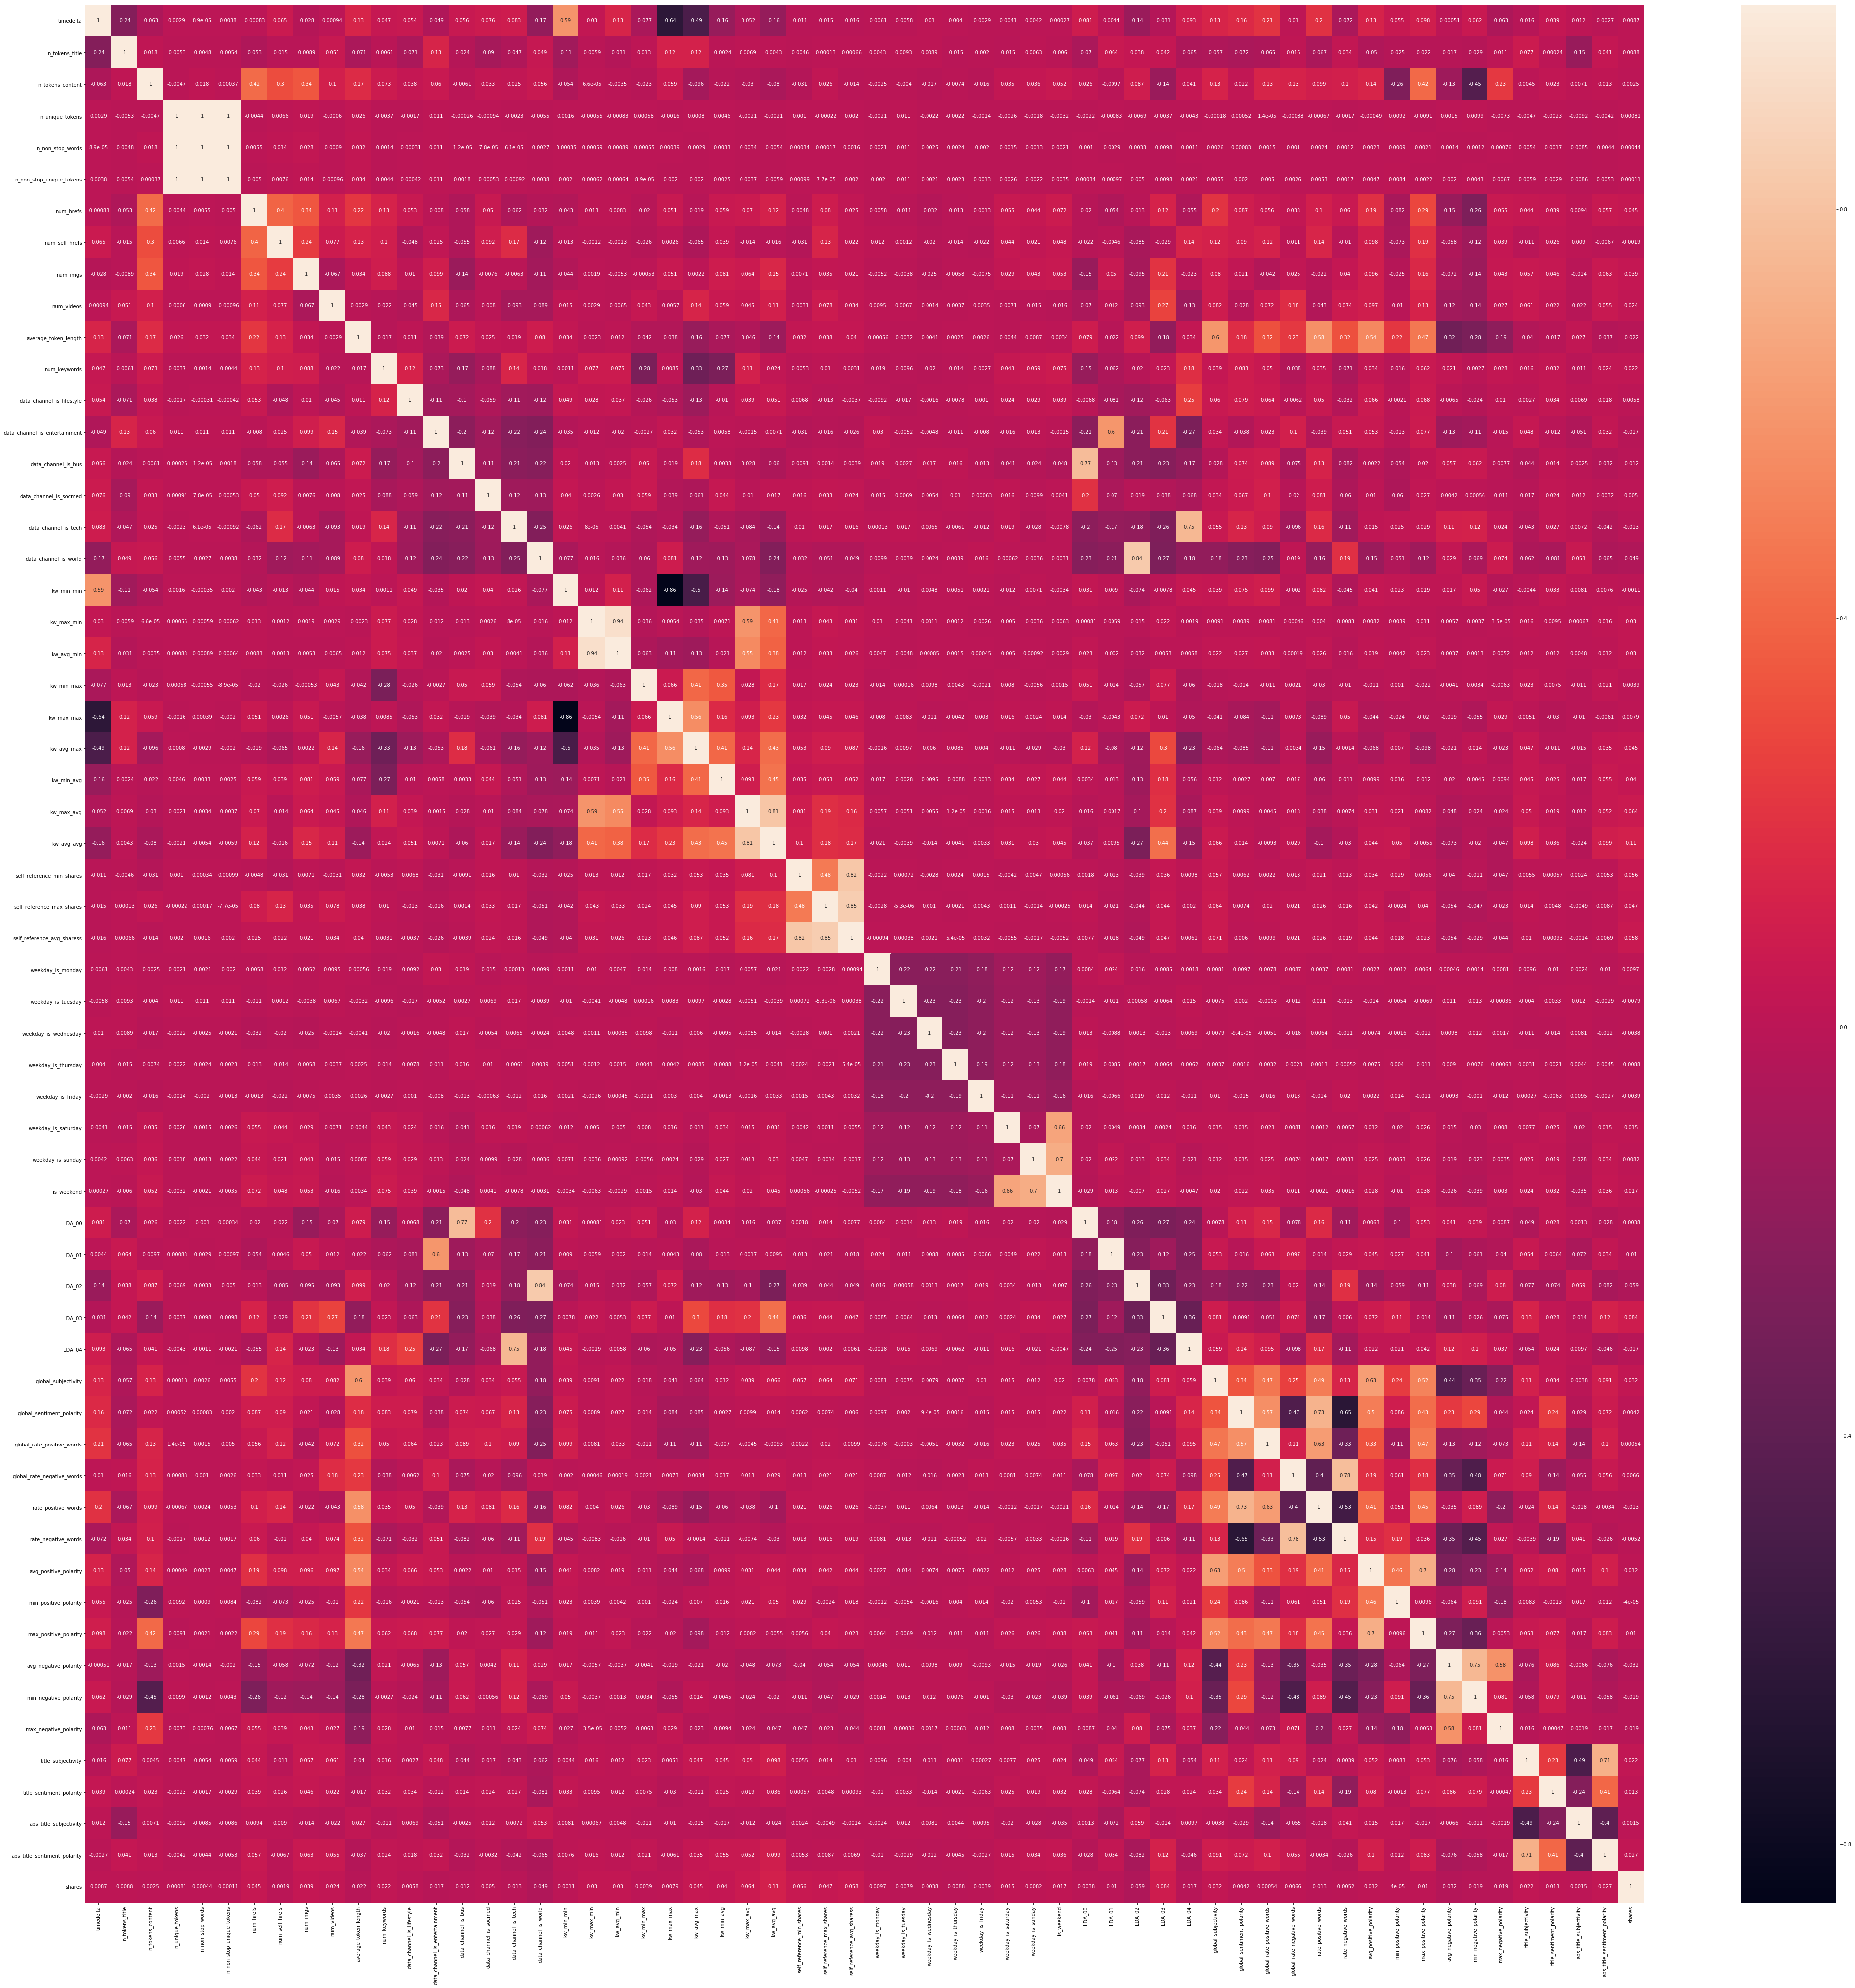

In [115]:
plt.figure(figsize=(70,70))
sns.heatmap(online_df.corr(),annot=True)

#### C.	Plot best X with Y and find how the Y is varying with X. Like if X is continuous, go for scatter plot. if X is categorical, go for box plot.

In [79]:
online_df.head()

,timedelta,n_tokens_title,n_tokens_content,n_unique_tokens,n_non_stop_words,n_non_stop_unique_tokens,num_hrefs,num_self_hrefs,num_imgs,num_videos,average_token_length,num_keywords,data_channel_is_lifestyle,data_channel_is_entertainment,data_channel_is_bus,data_channel_is_socmed,data_channel_is_tech,data_channel_is_world,kw_min_min,kw_max_min,kw_avg_min,kw_min_max,kw_max_max,kw_avg_max,kw_min_avg,kw_max_avg,kw_avg_avg,self_reference_min_shares,self_reference_max_shares,self_reference_avg_sharess,weekday_is_monday,weekday_is_tuesday,weekday_is_wednesday,weekday_is_thursday,weekday_is_friday,weekday_is_saturday,weekday_is_sunday,is_weekend,LDA_00,LDA_01,LDA_02,LDA_03,LDA_04,global_subjectivity,global_sentiment_polarity,global_rate_positive_words,global_rate_negative_words,rate_positive_words,rate_negative_words,avg_positive_polarity,min_positive_polarity,max_positive_polarity,avg_negative_polarity,min_negative_polarity,max_negative_polarity,title_subjectivity,title_sentiment_polarity,abs_title_subjectivity,abs_title_sentiment_polarity,class_shares,shares
0,731.0,12.0,219.0,0.663594,1.0,0.815385,4.0,2.0,1.0,0.0,4.680365,5.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,496.0,496.0,496.000000,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.500331,0.378279,0.040005,0.041263,0.040123,0.521617,0.092562,0.045662,0.013699,0.769231,0.230769,0.378636,0.100000,0.7,-0.350000,-0.600,-0.200000,0.500000,-0.187500,0.000000,0.187500,0,593
1,731.0,9.0,255.0,0.604743,1.0,0.791946,3.0,1.0,1.0,0.0,4.913725,4.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.799756,0.050047,0.050096,0.050101,0.050001,0.341246,0.148948,0.043137,0.015686,0.733333,0.266667,0.286915,0.033333,0.7,-0.118750,-0.125,-0.100000,0.000000,0.000000,0.500000,0.000000,0,711
2,731.0,9.0,211.0,0.575130,1.0,0.663866,3.0,1.0,1.0,0.0,4.393365,6.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,918.0,918.0,918.000000,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.217792,0.033334,0.033351,0.033334,0.682188,0.702222,0.323333,0.056872,0.009479,0.857143,0.142857,0.495833,0.100000,1.0,-0.466667,-0.800,-0.133333,0.000000,0.000000,0.500000,0.000000,1,1500
3,731.0,9.0,531.0,0.503788,1.0,0.665635,9.0,0.0,1.0,0.0,4.404896,7.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.028573,0.419300,0.494651,0.028905,0.028572,0.429850,0.100705,0.041431,0.020716,0.666667,0.333333,0.385965,0.136364,0.8,-0.369697,-0.600,-0.166667,0.000000,0.000000,0.500000,0.000000,0,1200
4,731.0,13.0,1072.0,0.415646,1.0,0.540890,19.0,19.0,20.0,0.0,4.682836,7.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,545.0,16000.0,3151.157895,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.028633,0.028794,0.028575,0.028572,0.885427,0.513502,0.281003,0.074627,0.012127,0.860215,0.139785,0.411127,0.033333,1.0,-0.220192,-0.500,-0.050000,0.454545,0.136364,0.045455,0.136364,0,505


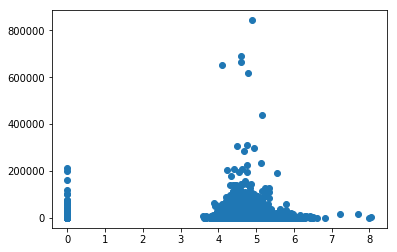

In [80]:
plt.scatter(online_df['average_token_length'],online_df['shares'])

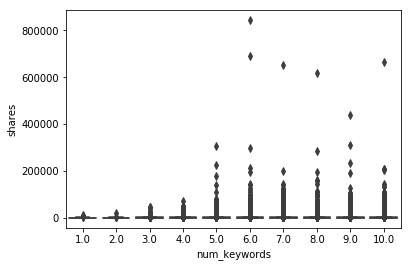

In [81]:
sns.boxplot(online_df['num_keywords'],online_df['shares'])

#### D.D.	Apply density plot and check if the data is normally distributed

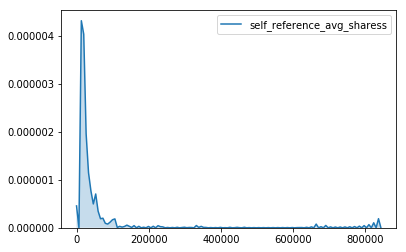

In [82]:
sns.kdeplot(online_df['self_reference_avg_sharess'],shade=True)

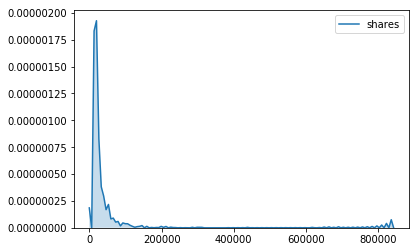

In [83]:
sns.kdeplot(online_df['shares'],shade=True)

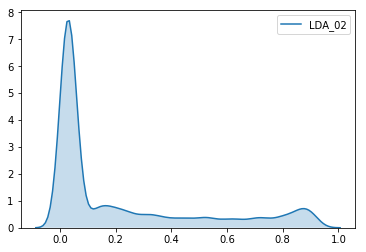

In [84]:
sns.kdeplot(online_df['LDA_02'],shade=True)

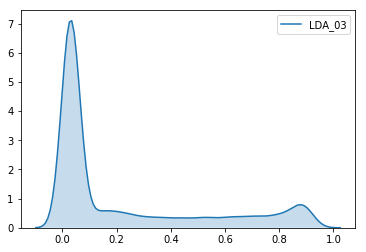

In [85]:
sns.kdeplot(online_df['LDA_03'],shade=True)

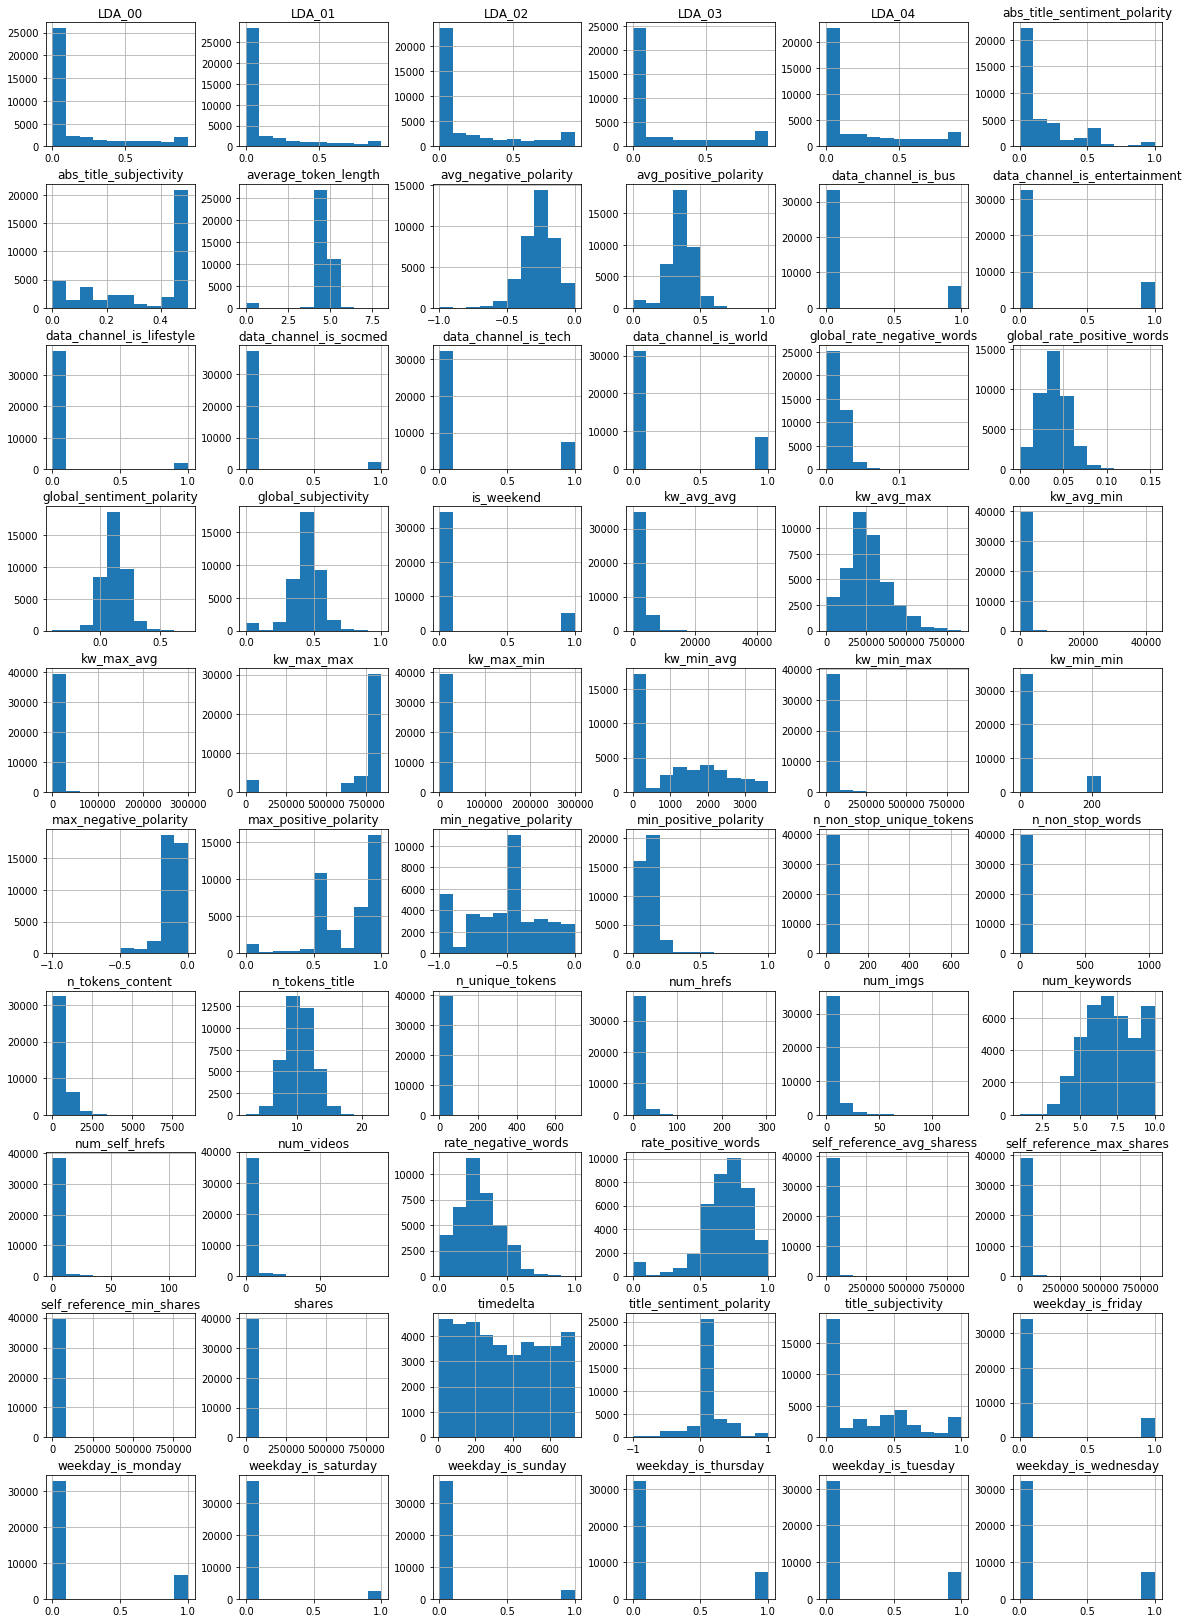

In [86]:
# plt.figure(figsize=(10,8))
online_df.hist(column=None,
    by=None,
    grid=True,
    xlabelsize=None,
    xrot=None,
    ylabelsize=None,
    yrot=None,
    ax=None,
    sharex=False,
    sharey=False,
    figsize=(20,29),
    layout=(10,6),
    bins=10);

# 5. EDA - Inference:

# 6.  Label Encoding / Get Dummies:

###        Target Column is binary so LogisticMOdel is already build

In [87]:
Logit_basemodel = LogisticRegression()

In [88]:
Logit_basemodel.fit(x_train, y_train)

D:\program\python\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [89]:
print('Train Accuracy',Logit_basemodel.score(x_train, y_train))

Train Accuracy 0.6095855855855856


In [90]:
print('Test Accuracy',Logit_basemodel.score(x_test, y_test))

Test Accuracy 0.6050109298806121


In [91]:
from sklearn.metrics import roc_auc_score, confusion_matrix, classification_report, roc_curve

In [92]:
Logit_pred = Log_model.predict(x_test)

In [93]:
print('confusion matrix')
confusion_matrix(y_test, Logit_pred)

confusion matrix


array([[2890, 2701],
       [1997, 4306]], dtype=int64)

In [94]:
print('classification report')
print(classification_report(y_test, Logit_pred))

classification report
              precision    recall  f1-score   support

           0       0.59      0.52      0.55      5591
           1       0.61      0.68      0.65      6303

    accuracy                           0.61     11894
   macro avg       0.60      0.60      0.60     11894
weighted avg       0.60      0.61      0.60     11894



In [95]:
# 1 = popular, 
# 0 = not_popular

In [96]:
Logit_pred_prob = Log_model.predict_proba(x_test)

In [97]:
Logit_pred_prob[:,1]

array([0.48361073, 0.46153088, 0.61543155, ..., 0.71716825, 0.60825213,
       0.42626087])

In [98]:
fpr, tpr, threshold = roc_curve(y_test, Logit_pred_prob[:,1])

Text(0, 0.5, 'True Positive rate (tpr)')

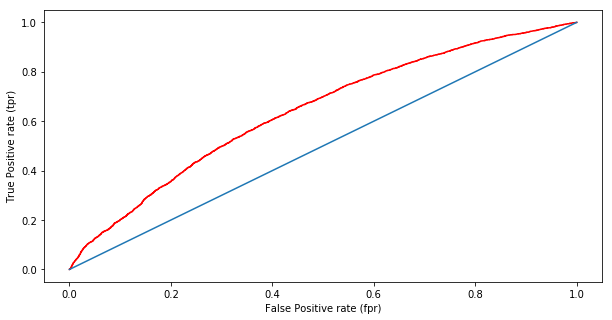

In [99]:
plt.figure(figsize=(10,5))
plt.plot(fpr, tpr, color='r')
plt.plot([0,1],[0,1])
plt.xlabel('False Positive rate (fpr)')
plt.ylabel('True Positive rate (tpr)')

In [100]:
roc_auc_score(y_test, Logit_pred_prob[:,1])

0.640876765493647

# 7.  Data handling:

Text(0.5, 0, 'not popular                                             popular')

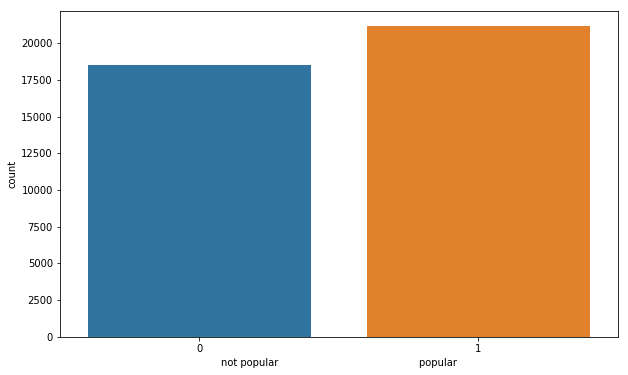

In [101]:
plt.figure(figsize=(10,6))
sns.countplot(online_df['class_shares'])
plt.xlabel('not popular                                             popular')

In [102]:
online_df['class_shares'].value_counts()

1    21154
0    18490
Name: class_shares, dtype: int64

In [103]:
21154 / online_df['class_shares'].count()

0.5335990313792756

In [104]:
18490 / online_df['class_shares'].count()

0.46640096862072444

# 8.  Feature selection and Feature engineering

In [105]:
from sklearn.feature_selection import RFE

In [106]:
x.head()

,timedelta,n_tokens_title,n_tokens_content,n_unique_tokens,n_non_stop_words,n_non_stop_unique_tokens,num_hrefs,num_self_hrefs,num_imgs,num_videos,average_token_length,num_keywords,data_channel_is_lifestyle,data_channel_is_entertainment,data_channel_is_bus,data_channel_is_socmed,data_channel_is_tech,data_channel_is_world,kw_min_min,kw_max_min,kw_avg_min,kw_min_max,kw_max_max,kw_avg_max,kw_min_avg,kw_max_avg,kw_avg_avg,self_reference_min_shares,self_reference_max_shares,self_reference_avg_sharess,weekday_is_monday,weekday_is_tuesday,weekday_is_wednesday,weekday_is_thursday,weekday_is_friday,weekday_is_saturday,weekday_is_sunday,is_weekend,LDA_00,LDA_01,LDA_02,LDA_03,LDA_04,global_subjectivity,global_sentiment_polarity,global_rate_positive_words,global_rate_negative_words,rate_positive_words,rate_negative_words,avg_positive_polarity,min_positive_polarity,max_positive_polarity,avg_negative_polarity,min_negative_polarity,max_negative_polarity,title_subjectivity,title_sentiment_polarity,abs_title_subjectivity,abs_title_sentiment_polarity
0,731.0,12.0,219.0,0.663594,1.0,0.815385,4.0,2.0,1.0,0.0,4.680365,5.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,496.0,496.0,496.000000,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.500331,0.378279,0.040005,0.041263,0.040123,0.521617,0.092562,0.045662,0.013699,0.769231,0.230769,0.378636,0.100000,0.7,-0.350000,-0.600,-0.200000,0.500000,-0.187500,0.000000,0.187500
1,731.0,9.0,255.0,0.604743,1.0,0.791946,3.0,1.0,1.0,0.0,4.913725,4.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.799756,0.050047,0.050096,0.050101,0.050001,0.341246,0.148948,0.043137,0.015686,0.733333,0.266667,0.286915,0.033333,0.7,-0.118750,-0.125,-0.100000,0.000000,0.000000,0.500000,0.000000
2,731.0,9.0,211.0,0.575130,1.0,0.663866,3.0,1.0,1.0,0.0,4.393365,6.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,918.0,918.0,918.000000,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.217792,0.033334,0.033351,0.033334,0.682188,0.702222,0.323333,0.056872,0.009479,0.857143,0.142857,0.495833,0.100000,1.0,-0.466667,-0.800,-0.133333,0.000000,0.000000,0.500000,0.000000
3,731.0,9.0,531.0,0.503788,1.0,0.665635,9.0,0.0,1.0,0.0,4.404896,7.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.028573,0.419300,0.494651,0.028905,0.028572,0.429850,0.100705,0.041431,0.020716,0.666667,0.333333,0.385965,0.136364,0.8,-0.369697,-0.600,-0.166667,0.000000,0.000000,0.500000,0.000000
4,731.0,13.0,1072.0,0.415646,1.0,0.540890,19.0,19.0,20.0,0.0,4.682836,7.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,545.0,16000.0,3151.157895,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.028633,0.028794,0.028575,0.028572,0.885427,0.513502,0.281003,0.074627,0.012127,0.860215,0.139785,0.411127,0.033333,1.0,-0.220192,-0.500,-0.050000,0.454545,0.136364,0.045455,0.136364


In [107]:
x_rfe = x

y_rfe = y

In [108]:
x_train, x_test, y_train, y_test = train_test_split(x_rfe, y_rfe, test_size=0.3, random_state=2)

In [109]:
rfe = RFE(Log_model,25)

In [110]:
rfe.fit(x_train, y_train)

D:\program\python\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
D:\program\python\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
D:\program\python\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
D:\program\python\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
D:\program\python\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
D:\pr

RFE(estimator=LogisticRegression(C=1.0, class_weight=None, dual=False,
                                 fit_intercept=True, intercept_scaling=1,
                                 l1_ratio=None, max_iter=100,
                                 multi_class='warn', n_jobs=None, penalty='l2',
                                 random_state=None, solver='warn', tol=0.0001,
                                 verbose=0, warm_start=False),
    n_features_to_select=25, step=1, verbose=0)

In [111]:
rfe.ranking_

array([20, 17, 19,  4,  1,  1, 12, 11, 13, 14,  8,  6,  1,  1,  1,  1,  7,
        1, 16, 24, 23, 33, 27, 28, 21, 22, 18, 26, 29, 25,  5,  2,  1,  3,
        1,  1,  1,  1,  1,  1,  1,  1,  1, 30, 10, 34, 31, 35,  1,  1,  1,
        9,  1, 15,  1, 32,  1,  1,  1])

In [112]:
rfe.support_

array([False, False, False, False,  True,  True, False, False, False,
       False, False, False,  True,  True,  True,  True, False,  True,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False,  True, False,  True,  True,
        True,  True,  True,  True,  True,  True,  True, False, False,
       False, False, False,  True,  True,  True, False,  True, False,
        True, False,  True,  True,  True])

In [113]:
x_rfe.columns

Index(['timedelta', 'n_tokens_title', 'n_tokens_content', 'n_unique_tokens',
       'n_non_stop_words', 'n_non_stop_unique_tokens', 'num_hrefs',
       'num_self_hrefs', 'num_imgs', 'num_videos', 'average_token_length',
       'num_keywords', 'data_channel_is_lifestyle',
       'data_channel_is_entertainment', 'data_channel_is_bus',
       'data_channel_is_socmed', 'data_channel_is_tech',
       'data_channel_is_world', 'kw_min_min', 'kw_max_min', 'kw_avg_min',
       'kw_min_max', 'kw_max_max', 'kw_avg_max', 'kw_min_avg', 'kw_max_avg',
       'kw_avg_avg', 'self_reference_min_shares', 'self_reference_max_shares',
       'self_reference_avg_sharess', 'weekday_is_monday', 'weekday_is_tuesday',
       'weekday_is_wednesday', 'weekday_is_thursday', 'weekday_is_friday',
       'weekday_is_saturday', 'weekday_is_sunday', 'is_weekend', 'LDA_00',
       'LDA_01', 'LDA_02', 'LDA_03', 'LDA_04', 'global_subjectivity',
       'global_sentiment_polarity', 'global_rate_positive_words',
       'glob

In [114]:
solv = pd.DataFrame()

In [115]:
solv['name'] = x_rfe.columns

In [116]:
solv['imp'] = rfe.ranking_

In [117]:
solv[solv['imp'] == 1]['name'].tolist()

['n_non_stop_words',
 'n_non_stop_unique_tokens',
 'data_channel_is_lifestyle',
 'data_channel_is_entertainment',
 'data_channel_is_bus',
 'data_channel_is_socmed',
 'data_channel_is_world',
 'weekday_is_wednesday',
 'weekday_is_friday',
 'weekday_is_saturday',
 'weekday_is_sunday',
 'is_weekend',
 'LDA_00',
 'LDA_01',
 'LDA_02',
 'LDA_03',
 'LDA_04',
 'rate_negative_words',
 'avg_positive_polarity',
 'min_positive_polarity',
 'avg_negative_polarity',
 'max_negative_polarity',
 'title_sentiment_polarity',
 'abs_title_subjectivity',
 'abs_title_sentiment_polarity']

In [118]:
LR_rfe = LogisticRegression()

In [119]:
x_rfe_t = x[solv[solv['imp'] == 1]['name'].tolist()]

y_rfe = y

from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x_rfe_t, y_rfe, test_size=0.3, random_state=2)

x_train.shape, x_test.shape, y_train.shape, y_test.shape

((27750, 25), (11894, 25), (27750,), (11894,))

In [120]:
LR_rfe.fit(x_train, y_train)

D:\program\python\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [121]:
print(LR_rfe.score(x_train, y_train))

print(LR_rfe.score(x_test, y_test))

0.636972972972973
0.6273751471330082


In [122]:
Logit_pred_rfe = LR_rfe.predict(x_test)

In [123]:
print('confusion matrix')
confusion_matrix(y_test, Logit_pred_rfe)

confusion matrix


array([[2991, 2598],
       [1834, 4471]], dtype=int64)

In [124]:
print('classification report')
print(classification_report(y_test, Logit_pred_rfe))

classification report
              precision    recall  f1-score   support

           0       0.62      0.54      0.57      5589
           1       0.63      0.71      0.67      6305

    accuracy                           0.63     11894
   macro avg       0.63      0.62      0.62     11894
weighted avg       0.63      0.63      0.62     11894



In [125]:
# 1 = popular, 
# 0 = not_popular

In [126]:
Logit_pred_prob = LR_rfe.predict_proba(x_test)

In [127]:
Logit_pred_prob[:,1]

array([0.61511919, 0.54326085, 0.64378944, ..., 0.49168244, 0.54601177,
       0.57073741])

In [128]:
fpr, tpr, threshold = roc_curve(y_test, Logit_pred_prob[:,1])

Text(0, 0.5, 'True Positive rate (tpr)')

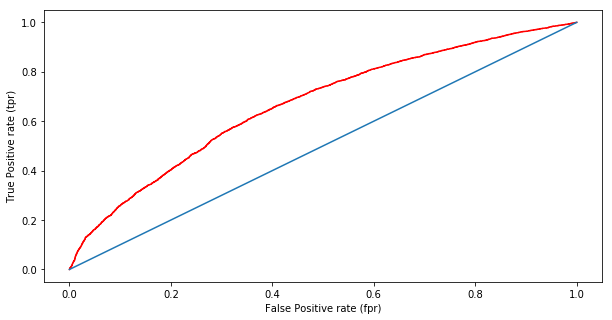

In [129]:
plt.figure(figsize=(10,5))
plt.plot(fpr, tpr, color='r')
plt.plot([0,1],[0,1])
plt.xlabel('False Positive rate (fpr)')
plt.ylabel('True Positive rate (tpr)')

In [130]:
roc_auc_score(y_test, Logit_pred_prob[:,1])

0.6690972368545952

In [131]:
x.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39644 entries, 0 to 39643
Data columns (total 59 columns):
timedelta                        39644 non-null float64
n_tokens_title                   39644 non-null float64
n_tokens_content                 39644 non-null float64
n_unique_tokens                  39644 non-null float64
n_non_stop_words                 39644 non-null float64
n_non_stop_unique_tokens         39644 non-null float64
num_hrefs                        39644 non-null float64
num_self_hrefs                   39644 non-null float64
num_imgs                         39644 non-null float64
num_videos                       39644 non-null float64
average_token_length             39644 non-null float64
num_keywords                     39644 non-null float64
data_channel_is_lifestyle        39644 non-null float64
data_channel_is_entertainment    39644 non-null float64
data_channel_is_bus              39644 non-null float64
data_channel_is_socmed           39644 non-null flo

In [132]:
#Backward Elimination
cols = list(x.columns)
pmax = 1
while (len(cols)>0):
    p= []
    X_1 = x.select_dtypes('category').astype(int).join(x.select_dtypes(exclude='category'))[cols]
    X_1 = add_constant(X_1)
    model = Logit(y,X_1).fit()
    p = pd.Series(model.pvalues.values[1:],index = cols)      
    pmax = max(p)
    feature_with_p_max = p.idxmax()
    if(pmax>0.05):
        cols.remove(feature_with_p_max)
    else:
        break
selected_features_BE = cols
print(selected_features_BE)

D:\program\python\lib\site-packages\numpy\core\fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


         Current function value: 0.623473
         Iterations: 35


D:\program\python\lib\site-packages\statsmodels\base\model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
D:\program\python\lib\site-packages\statsmodels\base\model.py:1092: RuntimeWarning: invalid value encountered in sqrt
  bse_ = np.sqrt(np.diag(self.cov_params()))
D:\program\python\lib\site-packages\scipy\stats\_distn_infrastructure.py:877: RuntimeWarning: invalid value encountered in greater
  return (self.a < x) & (x < self.b)
D:\program\python\lib\site-packages\scipy\stats\_distn_infrastructure.py:877: RuntimeWarning: invalid value encountered in less
  return (self.a < x) & (x < self.b)
D:\program\python\lib\site-packages\scipy\stats\_distn_infrastructure.py:1831: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= self.a)


         Current function value: 0.623473
         Iterations: 35


D:\program\python\lib\site-packages\statsmodels\base\model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


         Current function value: 0.623468
         Iterations: 35


D:\program\python\lib\site-packages\statsmodels\base\model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


         Current function value: 0.623468
         Iterations: 35


D:\program\python\lib\site-packages\statsmodels\base\model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


         Current function value: 0.623468
         Iterations: 35


D:\program\python\lib\site-packages\statsmodels\base\model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


         Current function value: 0.623468
         Iterations: 35


D:\program\python\lib\site-packages\statsmodels\base\model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


         Current function value: 0.623465
         Iterations: 35


D:\program\python\lib\site-packages\statsmodels\base\model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


         Current function value: 0.623467
         Iterations: 35


D:\program\python\lib\site-packages\statsmodels\base\model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


         Current function value: 0.623468
         Iterations: 35


D:\program\python\lib\site-packages\statsmodels\base\model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


         Current function value: 0.623469
         Iterations: 35


D:\program\python\lib\site-packages\statsmodels\base\model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


         Current function value: 0.623471
         Iterations: 35


D:\program\python\lib\site-packages\statsmodels\base\model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


         Current function value: 0.623475
         Iterations: 35


D:\program\python\lib\site-packages\statsmodels\base\model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


         Current function value: 0.623479
         Iterations: 35


D:\program\python\lib\site-packages\statsmodels\base\model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


         Current function value: 0.623485
         Iterations: 35


D:\program\python\lib\site-packages\statsmodels\base\model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


         Current function value: 0.623493
         Iterations: 35


D:\program\python\lib\site-packages\statsmodels\base\model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


         Current function value: 0.623507
         Iterations: 35


D:\program\python\lib\site-packages\statsmodels\base\model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


         Current function value: 0.623424
         Iterations: 35


D:\program\python\lib\site-packages\statsmodels\base\model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


         Current function value: 0.623464
         Iterations: 35
['n_tokens_content', 'n_non_stop_words', 'n_non_stop_unique_tokens', 'num_hrefs', 'num_self_hrefs', 'average_token_length', 'num_keywords', 'data_channel_is_lifestyle', 'data_channel_is_entertainment', 'data_channel_is_bus', 'data_channel_is_socmed', 'data_channel_is_tech', 'kw_min_min', 'kw_max_min', 'kw_avg_min', 'kw_min_max', 'kw_max_max', 'kw_avg_max', 'kw_min_avg', 'kw_max_avg', 'kw_avg_avg', 'self_reference_min_shares', 'self_reference_avg_sharess', 'weekday_is_monday', 'weekday_is_tuesday', 'weekday_is_wednesday', 'weekday_is_thursday', 'weekday_is_friday', 'weekday_is_sunday', 'LDA_00', 'LDA_01', 'LDA_02', 'LDA_03', 'LDA_04', 'global_subjectivity', 'global_rate_positive_words', 'global_rate_negative_words', 'rate_negative_words', 'min_positive_polarity', 'title_subjectivity', 'title_sentiment_polarity', 'abs_title_subjectivity']


D:\program\python\lib\site-packages\statsmodels\base\model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


In [133]:
LR_back = LogisticRegression()

In [134]:
x_back_t = x[['n_tokens_content', 'n_non_stop_words', 'n_non_stop_unique_tokens', 'num_hrefs', 'num_self_hrefs', 'average_token_length', 'num_keywords', 'data_channel_is_lifestyle', 'data_channel_is_entertainment', 'data_channel_is_bus', 'data_channel_is_socmed', 'data_channel_is_tech', 'kw_min_min', 'kw_max_min', 'kw_avg_min', 'kw_min_max', 'kw_max_max', 'kw_avg_max', 'kw_min_avg', 'kw_max_avg', 'kw_avg_avg', 'self_reference_min_shares', 'self_reference_avg_sharess', 'weekday_is_monday', 'weekday_is_tuesday', 'weekday_is_wednesday', 'weekday_is_thursday', 'weekday_is_friday', 'weekday_is_sunday', 'LDA_00', 'LDA_01', 'LDA_02', 'LDA_03', 'LDA_04', 'global_subjectivity', 'global_rate_positive_words', 'global_rate_negative_words', 'rate_negative_words', 'min_positive_polarity', 'title_subjectivity', 'title_sentiment_polarity', 'abs_title_subjectivity']]

y_back = y

from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x_back_t, y_back, test_size=0.3, random_state=2)

x_train.shape, x_test.shape, y_train.shape, y_test.shape

((27750, 42), (11894, 42), (27750,), (11894,))

In [135]:
LR_back.fit(x_train, y_train)

D:\program\python\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [136]:
print(LR_back.score(x_train, y_train))

print(LR_back.score(x_test, y_test))

0.6102342342342343
0.6039179418194047


In [137]:
Logit_pred_back = LR_back.predict(x_test)

In [138]:
print('confusion matrix')
confusion_matrix(y_test, Logit_pred_back)

confusion matrix


array([[2828, 2761],
       [1950, 4355]], dtype=int64)

In [139]:
print('classification report')
print(classification_report(y_test, Logit_pred_back))

classification report
              precision    recall  f1-score   support

           0       0.59      0.51      0.55      5589
           1       0.61      0.69      0.65      6305

    accuracy                           0.60     11894
   macro avg       0.60      0.60      0.60     11894
weighted avg       0.60      0.60      0.60     11894



In [140]:
# 1 = popular, 
# 0 = not_popular

In [141]:
Logit_pred_prob = LR_back.predict_proba(x_test)

In [142]:
Logit_pred_prob[:,1]

array([0.4596127 , 0.51971368, 0.46397518, ..., 0.80887977, 0.47283777,
       0.64678378])

In [143]:
fpr, tpr, threshold = roc_curve(y_test, Logit_pred_prob[:,1])

Text(0, 0.5, 'True Positive rate (tpr)')

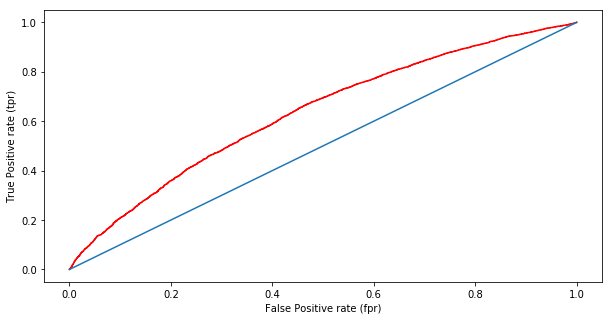

In [144]:
plt.figure(figsize=(10,5))
plt.plot(fpr, tpr, color='r')
plt.plot([0,1],[0,1])
plt.xlabel('False Positive rate (fpr)')
plt.ylabel('True Positive rate (tpr)')

In [145]:
roc_auc_score(y_test, Logit_pred_prob[:,1])

0.6339672822266578

#### RFE IS GIVING BEST AUC SO RFE FEATURES ARE GOOD RFE(66) and BACK(63) both are better then base model

# 9.  logistic, decision tree, KNN, Naïve Bayes

In [146]:
rfe_column = ['n_non_stop_words',
 'n_non_stop_unique_tokens',
 'data_channel_is_lifestyle',
 'data_channel_is_entertainment',
 'data_channel_is_bus',
 'data_channel_is_socmed',
 'data_channel_is_world',
 'weekday_is_wednesday',
 'weekday_is_friday',
 'weekday_is_saturday',
 'weekday_is_sunday',
 'is_weekend',
 'LDA_00',
 'LDA_01',
 'LDA_02',
 'LDA_03',
 'LDA_04',
 'rate_negative_words',
 'avg_positive_polarity',
 'min_positive_polarity',
 'avg_negative_polarity',
 'max_negative_polarity',
 'title_sentiment_polarity',
 'abs_title_subjectivity',
 'abs_title_sentiment_polarity']

In [147]:
from scipy.stats import zscore

In [148]:
x.head()

,timedelta,n_tokens_title,n_tokens_content,n_unique_tokens,n_non_stop_words,n_non_stop_unique_tokens,num_hrefs,num_self_hrefs,num_imgs,num_videos,average_token_length,num_keywords,data_channel_is_lifestyle,data_channel_is_entertainment,data_channel_is_bus,data_channel_is_socmed,data_channel_is_tech,data_channel_is_world,kw_min_min,kw_max_min,kw_avg_min,kw_min_max,kw_max_max,kw_avg_max,kw_min_avg,kw_max_avg,kw_avg_avg,self_reference_min_shares,self_reference_max_shares,self_reference_avg_sharess,weekday_is_monday,weekday_is_tuesday,weekday_is_wednesday,weekday_is_thursday,weekday_is_friday,weekday_is_saturday,weekday_is_sunday,is_weekend,LDA_00,LDA_01,LDA_02,LDA_03,LDA_04,global_subjectivity,global_sentiment_polarity,global_rate_positive_words,global_rate_negative_words,rate_positive_words,rate_negative_words,avg_positive_polarity,min_positive_polarity,max_positive_polarity,avg_negative_polarity,min_negative_polarity,max_negative_polarity,title_subjectivity,title_sentiment_polarity,abs_title_subjectivity,abs_title_sentiment_polarity
0,731.0,12.0,219.0,0.663594,1.0,0.815385,4.0,2.0,1.0,0.0,4.680365,5.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,496.0,496.0,496.000000,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.500331,0.378279,0.040005,0.041263,0.040123,0.521617,0.092562,0.045662,0.013699,0.769231,0.230769,0.378636,0.100000,0.7,-0.350000,-0.600,-0.200000,0.500000,-0.187500,0.000000,0.187500
1,731.0,9.0,255.0,0.604743,1.0,0.791946,3.0,1.0,1.0,0.0,4.913725,4.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.799756,0.050047,0.050096,0.050101,0.050001,0.341246,0.148948,0.043137,0.015686,0.733333,0.266667,0.286915,0.033333,0.7,-0.118750,-0.125,-0.100000,0.000000,0.000000,0.500000,0.000000
2,731.0,9.0,211.0,0.575130,1.0,0.663866,3.0,1.0,1.0,0.0,4.393365,6.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,918.0,918.0,918.000000,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.217792,0.033334,0.033351,0.033334,0.682188,0.702222,0.323333,0.056872,0.009479,0.857143,0.142857,0.495833,0.100000,1.0,-0.466667,-0.800,-0.133333,0.000000,0.000000,0.500000,0.000000
3,731.0,9.0,531.0,0.503788,1.0,0.665635,9.0,0.0,1.0,0.0,4.404896,7.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.028573,0.419300,0.494651,0.028905,0.028572,0.429850,0.100705,0.041431,0.020716,0.666667,0.333333,0.385965,0.136364,0.8,-0.369697,-0.600,-0.166667,0.000000,0.000000,0.500000,0.000000
4,731.0,13.0,1072.0,0.415646,1.0,0.540890,19.0,19.0,20.0,0.0,4.682836,7.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,545.0,16000.0,3151.157895,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.028633,0.028794,0.028575,0.028572,0.885427,0.513502,0.281003,0.074627,0.012127,0.860215,0.139785,0.411127,0.033333,1.0,-0.220192,-0.500,-0.050000,0.454545,0.136364,0.045455,0.136364


In [149]:
y.head()

0    0
1    0
2    1
3    0
4    0
Name: class_shares, dtype: category
Categories (2, int64): [0, 1]

In [150]:
x = x.apply(zscore)

In [151]:
x.head()

,timedelta,n_tokens_title,n_tokens_content,n_unique_tokens,n_non_stop_words,n_non_stop_unique_tokens,num_hrefs,num_self_hrefs,num_imgs,num_videos,average_token_length,num_keywords,data_channel_is_lifestyle,data_channel_is_entertainment,data_channel_is_bus,data_channel_is_socmed,data_channel_is_tech,data_channel_is_world,kw_min_min,kw_max_min,kw_avg_min,kw_min_max,kw_max_max,kw_avg_max,kw_min_avg,kw_max_avg,kw_avg_avg,self_reference_min_shares,self_reference_max_shares,self_reference_avg_sharess,weekday_is_monday,weekday_is_tuesday,weekday_is_wednesday,weekday_is_thursday,weekday_is_friday,weekday_is_saturday,weekday_is_sunday,is_weekend,LDA_00,LDA_01,LDA_02,LDA_03,LDA_04,global_subjectivity,global_sentiment_polarity,global_rate_positive_words,global_rate_negative_words,rate_positive_words,rate_negative_words,avg_positive_polarity,min_positive_polarity,max_positive_polarity,avg_negative_polarity,min_negative_polarity,max_negative_polarity,title_subjectivity,title_sentiment_polarity,abs_title_subjectivity,abs_title_sentiment_polarity
0,1.75788,0.757447,-0.695210,0.032772,0.000675,0.038658,-0.607463,-0.335566,-0.426526,-0.304268,0.156474,-1.164821,-0.236445,2.148880,-0.432948,-0.249487,-0.476911,-0.519566,-0.374924,-0.299111,-0.503188,-0.234755,-3.507348,-1.919178,-0.982156,-0.927595,-2.379014,-0.177459,-0.239676,-0.243926,2.225232,-0.478664,-0.480454,-0.473761,-0.409827,-0.256821,-0.272322,-0.388118,1.200633,1.078827,-0.624921,-0.618276,-0.670541,0.670593,-0.275946,0.346403,-0.269079,0.457827,-0.366077,0.237337,0.063865,-0.228941,-0.708369,-0.268895,-0.969886,0.671245,-0.975432,-1.810719,0.138920
1,1.75788,-0.661657,-0.618794,0.016056,0.000675,0.031479,-0.695709,-0.594963,-0.426526,-0.304268,0.432838,-1.688626,-0.236445,-0.465359,2.309747,-0.249487,-0.476911,-0.519566,-0.374924,-0.299111,-0.503188,-0.234755,-3.507348,-1.919178,-0.982156,-0.927595,-2.379014,-0.202587,-0.251766,-0.264412,2.225232,-0.478664,-0.480454,-0.473761,-0.409827,-0.256821,-0.272322,-0.388118,2.339253,-0.415144,-0.589153,-0.588335,-0.636381,-0.875228,0.305774,0.201534,-0.085507,0.269096,-0.136192,-0.640040,-0.870968,-0.228941,1.102174,1.367424,0.078642,-0.870807,-0.269076,0.837749,-0.689658
2,1.75788,-0.661657,-0.712192,0.007645,0.000675,-0.007752,-0.695709,-0.594963,-0.426526,-0.304268,-0.183415,-0.641015,-0.236445,-0.465359,2.309747,-0.249487,-0.476911,-0.519566,-0.374924,-0.299111,-0.503188,-0.234755,-3.507348,-1.919178,-0.982156,-0.927595,-2.379014,-0.156079,-0.229390,-0.226496,2.225232,-0.478664,-0.480454,-0.473761,-0.409827,-0.256821,-0.272322,-0.388118,0.126224,-0.491211,-0.648502,-0.645137,1.549759,2.218418,2.104872,0.989601,-0.658817,0.920026,-0.929060,1.358401,0.063865,0.981798,-1.621797,-0.957871,-0.270867,-0.870807,-0.269076,0.837749,-0.689658
3,1.75788,-0.661657,-0.032933,-0.012619,0.000675,-0.007211,-0.166229,-0.854360,-0.426526,-0.304268,-0.169758,-0.117210,-0.236445,2.148880,-0.432948,-0.249487,-0.476911,-0.519566,-0.374924,-0.299111,-0.503188,-0.234755,-3.507348,-1.919178,-0.982156,-0.927595,-2.379014,-0.202587,-0.251766,-0.264412,2.225232,-0.478664,-0.480454,-0.473761,-0.409827,-0.256821,-0.272322,-0.388118,-0.593319,1.265535,0.986490,-0.660140,-0.710484,-0.115874,-0.191940,0.103648,0.378984,-0.081405,0.290738,0.307442,0.573773,0.174639,-0.862584,-0.268895,-0.620377,-0.870807,-0.269076,0.837749,-0.689658
4,1.75788,1.230482,1.115439,-0.037655,0.000675,-0.045420,0.716237,4.074185,1.860061,-0.304268,0.159400,-0.117210,-0.236445,-0.465359,-0.432948,-0.249487,2.096826,-0.519566,-0.374924,-0.299111,-0.503188,-0.234755,-3.507348,-1.919178,-0.982156,-0.927595,-2.379014,-0.174976,0.138221,-0.134259,2.225232,-0.478664,-0.480454,-0.473761,-0.409827,-0.256821,-0.272322,-0.388118,-0.593092,-0.511879,-0.665431,-0.661269,2.252569,0.601046,1.668164,2.008329,-0.414241,0.936179,-0.948734,0.548135,-0.870968,0.981798,0.307944,0.075594,0.602906,0.531059,0.244637,-1.569949,-0.087056


In [152]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state = 42)

In [153]:
from sklearn.tree import DecisionTreeClassifier

In [154]:
DT = DecisionTreeClassifier()

In [155]:
DT.fit(x_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

In [156]:
DT.score(x_train, y_train)

1.0

In [157]:
DT.score(x_test, y_test)

0.5874390448965865

In [158]:
DT_pred = DT.predict(x_test)

In [159]:
print('confusion matrix')
confusion_matrix(y_test, DT_pred)

confusion matrix


array([[3134, 2457],
       [2450, 3853]], dtype=int64)

In [160]:
print('classification report')
print(classification_report(y_test, DT_pred))

classification report
              precision    recall  f1-score   support

           0       0.56      0.56      0.56      5591
           1       0.61      0.61      0.61      6303

    accuracy                           0.59     11894
   macro avg       0.59      0.59      0.59     11894
weighted avg       0.59      0.59      0.59     11894



In [161]:
# 1 = popular, 
# 0 = not_popular

In [162]:
DT_pred_prob = DT.predict_proba(x_test)

In [163]:
DT_pred_prob[:,1]

array([1., 0., 0., ..., 1., 0., 0.])

In [164]:
fpr, tpr, threshold = roc_curve(y_test, DT_pred_prob[:,1])

Text(0, 0.5, 'True Positive rate (tpr)')

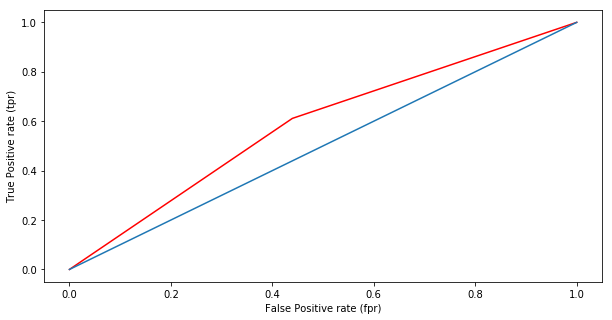

In [165]:
plt.figure(figsize=(10,5))
plt.plot(fpr, tpr, color='r')
plt.plot([0,1],[0,1])
plt.xlabel('False Positive rate (fpr)')
plt.ylabel('True Positive rate (tpr)')

In [166]:
roc_auc_score(y_test, Logit_pred_prob[:,1])

0.50290171078817

In [167]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB

In [168]:
KNN = KNeighborsClassifier()

In [169]:
KNN.fit(x_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [170]:
KNN.score(x_train, y_train)

0.7415855855855856

In [171]:
KNN.score(x_test, y_test)

0.6068606019841937

In [172]:
KNN_pred_prob = KNN.predict_proba(x_test)

In [173]:
roc_auc_score(y_test, KNN_pred_prob[:,1])

0.6407506023043709

In [174]:
GN = GaussianNB()

In [175]:
GN.fit(x_train, y_train)

GaussianNB(priors=None, var_smoothing=1e-09)

In [176]:
GN.score(x_train, y_train)

0.5087927927927928

In [177]:
GN.score(x_test, y_test)

0.5163107449134017

In [178]:
GN_pred_prob = GN.predict_proba(x_test)

In [179]:
roc_auc_score(y_test, GN_pred_prob[:,1])

0.6625720951259096

##  WIth RFE

In [180]:
rfe_column

['n_non_stop_words',
 'n_non_stop_unique_tokens',
 'data_channel_is_lifestyle',
 'data_channel_is_entertainment',
 'data_channel_is_bus',
 'data_channel_is_socmed',
 'data_channel_is_world',
 'weekday_is_wednesday',
 'weekday_is_friday',
 'weekday_is_saturday',
 'weekday_is_sunday',
 'is_weekend',
 'LDA_00',
 'LDA_01',
 'LDA_02',
 'LDA_03',
 'LDA_04',
 'rate_negative_words',
 'avg_positive_polarity',
 'min_positive_polarity',
 'avg_negative_polarity',
 'max_negative_polarity',
 'title_sentiment_polarity',
 'abs_title_subjectivity',
 'abs_title_sentiment_polarity']

In [181]:
x_rfe = x[['n_non_stop_words',
 'n_non_stop_unique_tokens',
 'data_channel_is_lifestyle',
 'data_channel_is_entertainment',
 'data_channel_is_bus',
 'data_channel_is_socmed',
 'data_channel_is_world',
 'weekday_is_wednesday',
 'weekday_is_friday',
 'weekday_is_saturday',
 'weekday_is_sunday',
 'is_weekend',
 'LDA_00',
 'LDA_01',
 'LDA_02',
 'LDA_03',
 'LDA_04',
 'rate_negative_words',
 'avg_positive_polarity',
 'min_positive_polarity',
 'avg_negative_polarity',
 'max_negative_polarity',
 'title_sentiment_polarity',
 'abs_title_subjectivity',
 'abs_title_sentiment_polarity']]

In [182]:
x_train, x_test, y_train, y_test = train_test_split(x_rfe, y, test_size=0.3, random_state = 42)

In [183]:
from sklearn.tree import DecisionTreeClassifier

In [184]:
DT = DecisionTreeClassifier()

In [185]:
DT.fit(x_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

In [186]:
DT.score(x_train, y_train)

0.9999639639639639

In [187]:
DT.score(x_test, y_test)

0.5570035311921977

In [188]:
DT_pred = DT.predict(x_test)

In [189]:
print('confusion matrix')
confusion_matrix(y_test, DT_pred)

confusion matrix


array([[2943, 2648],
       [2621, 3682]], dtype=int64)

In [190]:
print('classification report')
print(classification_report(y_test, DT_pred))

classification report
              precision    recall  f1-score   support

           0       0.53      0.53      0.53      5591
           1       0.58      0.58      0.58      6303

    accuracy                           0.56     11894
   macro avg       0.56      0.56      0.56     11894
weighted avg       0.56      0.56      0.56     11894



In [191]:
# 1 = popular, 
# 0 = not_popular

In [192]:
DT_pred_prob = DT.predict_proba(x_test)

In [193]:
DT_pred_prob[:,1]

array([1., 1., 0., ..., 0., 1., 0.])

In [194]:
fpr, tpr, threshold = roc_curve(y_test, DT_pred_prob[:,1])

Text(0, 0.5, 'True Positive rate (tpr)')

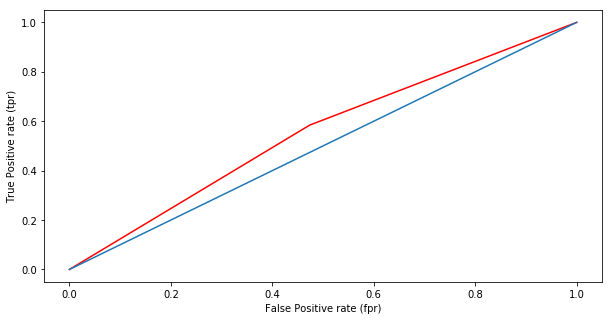

In [195]:
plt.figure(figsize=(10,5))
plt.plot(fpr, tpr, color='r')
plt.plot([0,1],[0,1])
plt.xlabel('False Positive rate (fpr)')
plt.ylabel('True Positive rate (tpr)')

In [212]:
roc_auc_score(y_test, Logit_pred_prob[:,1])

0.50290171078817

In [213]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB

In [214]:
KNN = KNeighborsClassifier()

In [215]:
KNN.fit(x_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [216]:
KNN.score(x_train, y_train)

0.729009009009009

In [217]:
KNN.score(x_test, y_test)

0.5906339330755003

In [218]:
KNN_pred_prob = KNN.predict_proba(x_test)

In [219]:
roc_auc_score(y_test, KNN_pred_prob[:,1])

0.614601053749236

In [220]:
GN = GaussianNB()

In [221]:
GN.fit(x_train, y_train)

GaussianNB(priors=None, var_smoothing=1e-09)

In [222]:
GN.score(x_train, y_train)

0.5449369369369369

In [223]:
GN.score(x_test, y_test)

0.5480073986884143

In [224]:
GN_pred_prob = GN.predict_proba(x_test)

In [225]:
roc_auc_score(y_test, GN_pred_prob[:,1])

0.6473673593127913

# 10.  Ensemble techniques:

In [226]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import BaggingClassifier


base_LR=LogisticRegression(random_state=2)


In [227]:
# LogisticRegression with BaggingClassifier
bag_LR=BaggingClassifier(base_estimator=base_LR,n_estimators=15,random_state=2)

# LogisticRegression with AdaBoostClassifier
boost_LR = AdaBoostClassifier(base_estimator=base_LR,n_estimators=50,random_state=2)

In [228]:
bag_LR.fit(x_train, y_train)

D:\program\python\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
D:\program\python\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
D:\program\python\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
D:\program\python\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
D:\program\python\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
D:\pr

BaggingClassifier(base_estimator=LogisticRegression(C=1.0, class_weight=None,
                                                    dual=False,
                                                    fit_intercept=True,
                                                    intercept_scaling=1,
                                                    l1_ratio=None, max_iter=100,
                                                    multi_class='warn',
                                                    n_jobs=None, penalty='l2',
                                                    random_state=2,
                                                    solver='warn', tol=0.0001,
                                                    verbose=0,
                                                    warm_start=False),
                  bootstrap=True, bootstrap_features=False, max_features=1.0,
                  max_samples=1.0, n_estimators=15, n_jobs=None,
                  oob_score=False, random_state=2, verbos

In [229]:
bag_LR.score(x_train, y_train)

0.6349549549549549

In [230]:
bag_LR.score(x_test, y_test)

0.6319993273919623

In [231]:
bag_LR_pred_prob = bag_LR.predict_proba(x_test)

In [232]:
roc_auc_score(y_test, bag_LR_pred_prob[:,1])

0.6741504479857349

In [233]:
boost_LR.fit(x_train, y_train)

D:\program\python\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
D:\program\python\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
D:\program\python\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
D:\program\python\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
D:\program\python\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
D:\pr

D:\program\python\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
D:\program\python\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
D:\program\python\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
D:\program\python\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
D:\program\python\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
D:\pr

AdaBoostClassifier(algorithm='SAMME.R',
                   base_estimator=LogisticRegression(C=1.0, class_weight=None,
                                                     dual=False,
                                                     fit_intercept=True,
                                                     intercept_scaling=1,
                                                     l1_ratio=None,
                                                     max_iter=100,
                                                     multi_class='warn',
                                                     n_jobs=None, penalty='l2',
                                                     random_state=2,
                                                     solver='warn', tol=0.0001,
                                                     verbose=0,
                                                     warm_start=False),
                   learning_rate=1.0, n_estimators=50, random_state=2)

In [234]:
boost_LR.score(x_train, y_train)

0.6345585585585586

In [235]:
boost_LR.score(x_test, y_test)

0.6303178072977972

In [236]:
boost_LR_pred_prob = boost_LR.predict_proba(x_test)

In [237]:
roc_auc_score(y_test, boost_LR_pred_prob[:,1])

0.6712695799466704

In [238]:
fpr, tpr, threshold = roc_curve(y_test, boost_LR_pred_prob[:,1])

Text(0, 0.5, 'True Positive rate (tpr)')

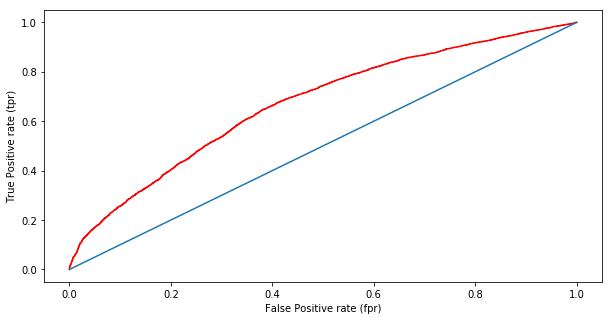

In [239]:
plt.figure(figsize=(10,5))
plt.plot(fpr, tpr, color='r')
plt.plot([0,1],[0,1])
plt.xlabel('False Positive rate (fpr)')
plt.ylabel('True Positive rate (tpr)')

# 11. Output

In [240]:
MODELS = pd.DataFrame()

In [241]:
MODELS['names'] = ['base model','Logit_rfe','Logit_back','DT', 'KNN_K3','GN','DT_rfe', 'KNN_rfe','BAGG_Log','Boost_Log']
MODELS['Train'] = [0.609,0.62,0.61,0.1,0.74, 0.50,0.99,0.61,0.63,0.63]
MODELS['Test'] = [0.605,0.63,0.60,0.58,0.60,0.51,0.55,0.59,0.63,0.63]
MODELS['AUC'] = [0.64,0.66,0.63,0.50,0.64,0.66,0.50,0.61,0.67,0.67]

In [242]:
MODELS

,names,Train,Test,AUC
0,base model,0.609,0.605,0.64
1,Logit_rfe,0.620,0.630,0.66
2,Logit_back,0.610,0.600,0.63
3,DT,0.100,0.580,0.50
4,KNN_K3,0.740,0.600,0.64
5,GN,0.500,0.510,0.66
6,DT_rfe,0.990,0.550,0.50
7,KNN_rfe,0.610,0.590,0.61
8,BAGG_Log,0.630,0.630,0.67
9,Boost_Log,0.630,0.630,0.67


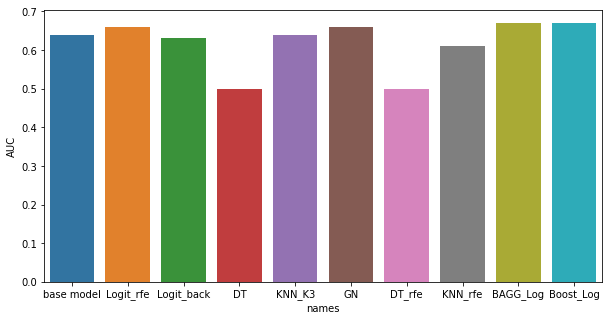

In [243]:
plt.figure(figsize=(10,5))
sns.barplot(MODELS['names'], MODELS['AUC'])

In [331]:
DT = DecisionTreeClassifier()

In [332]:
DT.fit(x_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

# DT.score(x_train, y_train)

In [200]:
from sklearn.model_selection import GridSearchCV

In [246]:
param_grid= {'criterion':['gini','entropy'],
             'max_depth':range(1,15)}

In [250]:
gscv = GridSearchCV(DT,
    param_grid = {'criterion':['gini','entropy'],
             'max_depth':range(1,15)},
    scoring=None,
    n_jobs=None,
    iid='warn',
    refit=True,
    cv=5,
    verbose=0,
    pre_dispatch='2*n_jobs',
    error_score='raise-deprecating',
    return_train_score=False,)

In [251]:
gscv.fit(x_train, y_train)

GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=DecisionTreeClassifier(class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features=None,
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              presort=False, random_state=0,
                                              splitter='best'),
             iid='warn', n_jobs=None,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': range(1, 15)},
             pre_dispatch='

In [252]:
gscv.best_params_

{'criterion': 'entropy', 'max_depth': 6}

In [253]:
gscv.best_score_

0.6282882882882883

In [262]:
DT = DecisionTreeClassifier(criterion='entropy',
    splitter='best',
    max_depth=6,
    min_samples_split=2,
    min_samples_leaf=1,
    min_weight_fraction_leaf=0.0,
    max_features=None,
    random_state=0,
    max_leaf_nodes=None,
    min_impurity_decrease=0.0,
    min_impurity_split=None,
    class_weight=None,
    presort=False,)

In [263]:
DT.fit(x_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=6,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=0, splitter='best')

In [264]:
DT.score(x_train, y_train)

0.6441801801801802

In [265]:
DT.score(x_test, y_test)

0.6352782915755844

In [266]:
DT_pred = DT.predict(x_test)

In [267]:
print('confusion matrix')
confusion_matrix(y_test, DT_pred)

confusion matrix


array([[3144, 2447],
       [1891, 4412]], dtype=int64)

In [268]:
print('classification report')
print(classification_report(y_test, DT_pred))

classification report
              precision    recall  f1-score   support

           0       0.62      0.56      0.59      5591
           1       0.64      0.70      0.67      6303

    accuracy                           0.64     11894
   macro avg       0.63      0.63      0.63     11894
weighted avg       0.63      0.64      0.63     11894



In [269]:
# 1 = popular, 
# 0 = not_popular

In [270]:
DT_pred_prob = DT.predict_proba(x_test)

In [271]:
DT_pred_prob[:,1]

array([0.6116208 , 0.58627626, 0.58627626, ..., 0.64617315, 0.39376218,
       0.80838323])

In [272]:
fpr, tpr, threshold = roc_curve(y_test, DT_pred_prob[:,1])

Text(0, 0.5, 'True Positive rate (tpr)')

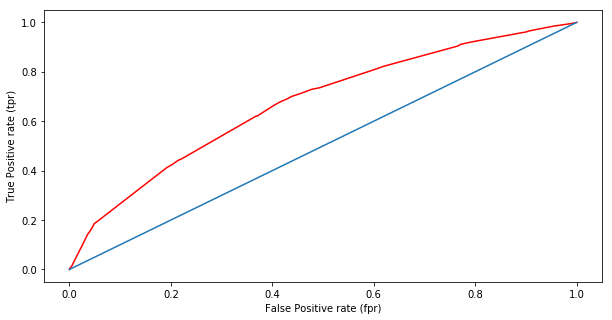

In [273]:
plt.figure(figsize=(10,5))
plt.plot(fpr, tpr, color='r')
plt.plot([0,1],[0,1])
plt.xlabel('False Positive rate (fpr)')
plt.ylabel('True Positive rate (tpr)')

In [275]:
roc_auc_score(y_test, Logit_pred_prob[:,1])

0.50290171078817